# Louisville Free Public Library

Visualizations based on the analysis of the Young Adult (YA) genre in the Louisville Free Public Library collection.

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path


# load the clean books data into a dataframe and show the first few rows
data_path = Path('results/books_clean.csv.gz')
books_df = pd.read_csv(data_path)
books_df.head()

,BibNum,Title,Author,PublicationYear,ItemType,ItemCollection,ItemLocation,ItemPrice,Genre,Audience
0,707409,"Jeff Immelt and the new GE way : innovation, t...","Magee, David, 1965-",2009,Book,Adult Non-Fiction,Main,25.95,Non-Fiction,Adult
1,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964-",2009,Book,Adult Non-Fiction,Southwest,19.99,Non-Fiction,Adult
2,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964-",2009,Book,Adult Non-Fiction,Southwest,19.99,Non-Fiction,Adult
3,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964-",2009,Book,Adult Non-Fiction,Remote Shelving - Main,19.99,Non-Fiction,Adult
4,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964-",2009,Book,Adult Non-Fiction,Remote Shelving - Main,19.99,Non-Fiction,Adult


<p>A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. </p>

<p>Add a bar plot that compares the cost among the all audiences (Adult, YA, and Children) for fiction genre specifically<p>

In [3]:
# Data masks
adult_fiction_mask = (books_df['Audience'] == 'Adult') & (books_df['Genre'] == 'Fiction')
ya_mask = (books_df['Audience'] == 'Teen') & (books_df['Genre'] == 'Fiction')
children_mask = (books_df['Audience'] == 'Children') & (books_df['Genre'] == 'Fiction')

# Totals by groups
adult_fiction = books_df[adult_fiction_mask]['ItemPrice'].sum()
adult_fiction
ya_fiction =  books_df[ya_mask]['ItemPrice'].sum()
ya_fiction
children_fiction =  books_df[children_mask]['ItemPrice'].sum()
children_fiction

687553.5900000001

Text(0.5, 1.0, 'Comparison of cost for all audiences')

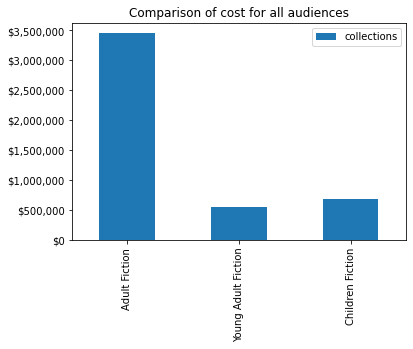

In [4]:
# add code for visualization

# Data masks
adult_fiction_mask = (books_df['Audience'] == 'Adult') & (books_df['Genre'] == 'Fiction')
ya_mask = (books_df['Audience'] == 'Teen') & (books_df['Genre'] == 'Fiction')
children_mask = (books_df['Audience'] == 'Children') & (books_df['Genre'] == 'Fiction')

# Totals by groups
adult_fiction = books_df[adult_fiction_mask]['ItemPrice'].sum()
ya_fiction =  books_df[ya_mask]['ItemPrice'].sum()
children_fiction =  books_df[children_mask]['ItemPrice'].sum()

# Plot a bar chart
plotdata = pd.DataFrame(
    {"collections": [adult_fiction, ya_fiction, children_fiction]}, 
    index=["Adult Fiction", "Young Adult Fiction", "Children Fiction"])


fig = plotdata.plot(kind="bar")
fmt = '${x:,.0f}'
fig.yaxis.set_major_formatter('${x:,.0f}')
fig.set_title('Comparison of cost for all audiences')


<h3>Unstacked bar plots</h3>
<p>The next step for your bar charting journey is the need to compare series from a different set of samples. Typically this leads to an “unstacked” bar plot.</p>
<p>Out of the box, Pandas plot provides what we need here, putting the index on the x-axis, and rendering each column as a separate series or set of bars, with a (usually) neatly positioned legend.</p>
<p>Add an unstacked plot that compares all audiences and genres<p>

Text(0.5, 1.0, 'Genre Audience Comparison')

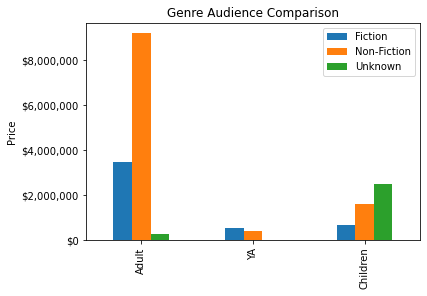

In [5]:
# add code for visualization

# Data masks
adult_fiction_mask = (books_df['Audience'] == 'Adult') & (books_df['Genre'] == 'Fiction')
ya_fiction_mask = (books_df['Audience'] == 'Teen') & (books_df['Genre'] == 'Fiction')
children_fiction_mask = (books_df['Audience'] == 'Children') & (books_df['Genre'] == 'Fiction')

adult_nonfiction_mask = (books_df['Audience'] == 'Adult') & (books_df['Genre'] == 'Non-Fiction')
ya_nonfiction_mask = (books_df['Audience'] == 'Teen') & (books_df['Genre'] == 'Non-Fiction')
children_nonfiction_mask = (books_df['Audience'] == 'Children') & (books_df['Genre'] == 'Non-Fiction')

adult_other_mask = (books_df['Audience'] == 'Adult') & (books_df['Genre'] == 'Unknown')
ya_other_mask = (books_df['Audience'] == 'Teen') & (books_df['Genre'] == 'Unknown')
children_other_mask = (books_df['Audience'] == 'Children') & (books_df['Genre'] == 'Unknown')

# Totals by groups
adult_fiction = int( books_df[adult_fiction_mask]['ItemPrice'].sum())
adult_nonfiction = int( books_df[adult_nonfiction_mask]['ItemPrice'].sum())
adult_other = int( books_df[adult_other_mask]['ItemPrice'].sum())

ya_fiction = int( books_df[ya_fiction_mask]['ItemPrice'].sum())
ya_nonfiction = int( books_df[ya_nonfiction_mask]['ItemPrice'].sum())
ya_other = int( books_df[ya_other_mask]['ItemPrice'].sum())

children_fiction = int( books_df[children_fiction_mask]['ItemPrice'].sum())
children_nonfiction = int( books_df[children_nonfiction_mask]['ItemPrice'].sum())
children_other = int( books_df[children_other_mask]['ItemPrice'].sum())

# Plot a bar chart
plotdata = pd.DataFrame(
    {"Fiction": [adult_fiction, ya_fiction, children_fiction],
     "Non-Fiction": [adult_nonfiction, ya_nonfiction, children_nonfiction],
     "Unknown": [adult_other, ya_other, children_other]}, 
    index=["Adult", "YA", "Children"])


fig = plotdata.plot(kind="bar")
fmt = '${x:,.0f}'
fig.yaxis.set_label_text('Price')
fig.yaxis.set_major_formatter('${x:,.0f}')
fig.set_title('Genre Audience Comparison')

<h3>Plot Lines</h3>
<p>Pandas provides you a quick and easy way to visualize the relationship between the features of a dataframe. The Pandas line plot represents information as a series of data points connected with a straight line. Very often, we use this to find out how a particular feature changes with respect to time and also with respect to one another.</p>
<p>Add a plot line that looks at the change of YA over time<p>

Text(0.5, 1.0, 'YA Books over time')

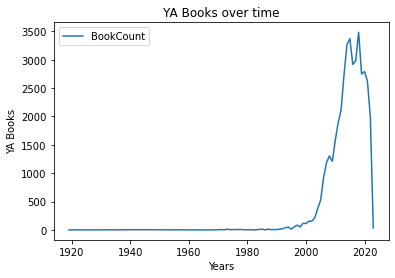

In [23]:

# add code for visualization
# Add a new column to the dataframe called "YA_Category"
# If the Audience == "Teen" and Genre == "Fiction" the value should be "YA"
# Otherwise the value should be "Other"
books_df['YA_Category'] = np.where(ya_mask, 'YA', 'Other')

# calculate the counts for all YA books by publication year
ya_years_count = books_df[['PublicationYear', 'ItemPrice']][books_df['YA_Category']=='YA'].groupby('PublicationYear').count()
#print(ya_years_count)
ya_years_count.columns = ['BookCount']
#print(ya_years_count.columns)
#print(ya_years_count)

# concatenate the counts and costs into a single dataframe
plotdf = pd.concat([ya_years_count], axis=1)

#plotdf

# Reset the index of the DataFrame after grouping by, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.
plotdf = plotdf.reset_index()
#print(plotdf)

count_by_years = plotdf[['PublicationYear','BookCount']]
#print(count_by_years)

# To use Publication year as x axis
count_by_years.set_index(['PublicationYear'],inplace=True)

#print(count_by_years)

fig = count_by_years.plot(kind="line")

fig.yaxis.set_label_text('YA Books')
fig.xaxis.set_label_text('Years')
fig.set_title('YA Books over time')

Text(0.5, 1.0, 'YA Books Cost over time')

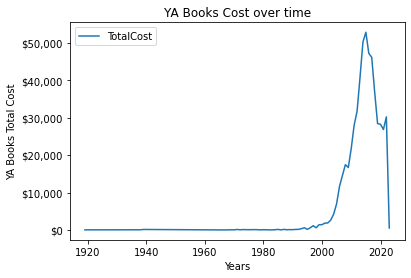

In [24]:
# add code for visualization
# Add a new column to the dataframe called "YA_Category"
# If the Audience == "Teen" and Genre == "Fiction" the value should be "YA"
# Otherwise the value should be "Other"
books_df['YA_Category'] = np.where(ya_mask, 'YA', 'Other')

# calculate total cost for all YA books by publication year

ya_years_price = books_df[['PublicationYear', 'ItemPrice']][books_df['YA_Category']=='YA'].groupby('PublicationYear').sum()
ya_years_price.columns = ['TotalCost']

# concatenate the counts and costs into a single dataframe
plotdf = pd.concat([ya_years_price], axis=1)

# Reset the index of the DataFrame after grouping by, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.
plotdf = plotdf.reset_index()

price_by_years = plotdf[['PublicationYear','TotalCost']]
# To use Publication year as x axis
price_by_years.set_index(['PublicationYear'],inplace=True)


fig = price_by_years.plot(kind="line")
fmt = '${x:,.0f}'
fig.yaxis.set_major_formatter('${x:,.0f}')
fig.yaxis.set_label_text('YA Books Total Cost')

fig.xaxis.set_label_text('Years')
fig.set_title('YA Books Cost over time')

<h3>Horizontal bar plotting</h3>

In [29]:
# Get the number of YA books by location
location_ya = books_df['ItemLocation'][books_df['YA_Category'] == 'YA']\
                    .value_counts()

print(location_ya)                 
#location_ya.rename("YABookCount", inplace=True)


Southwest                    5413
South Central                5238
Northeast                    4928
Main Teen                    3848
Remote Shelving - Shawnee    2988
St Matthews                  2636
Bon Air                      2072
Iroquois                     1910
Shawnee                      1830
Highlands - Shelby Park      1457
Jeffersontown                1425
Middletown                   1333
Crescent Hill                1252
Shively                      1206
Newburg                      1011
Western                      1009
Fairdale                      983
Portland                      491
Childrens Bookmobile          187
Remote Shelving - Main         26
Main                           12
Childrens Main Library          1
Content Management              1
Name: ItemLocation, dtype: int64


In [30]:
# add code for visualization 

# Get the number of YA books by location
location_ya = books_df['ItemLocation'][books_df['YA_Category'] == 'YA']\
                    .value_counts()
location_ya.rename("YABookCount", inplace=True)

# Get the total number of books by location
location_all = books_df['ItemLocation'].value_counts()
location_all.rename("TotalBookCount", inplace=True)

location_summary = pd.concat([location_all, location_ya], axis=1)

# calculate the percentage of YA books based on the YA count and the total count
location_summary['PercentYA'] = (location_summary['YABookCount'] / 
                                location_summary['TotalBookCount'])

# format the columns and display the dataframe values

location_summary['TotalBookCount'] = location_summary['TotalBookCount']\
                                    .apply(lambda x: "{:,}".format(x, axis=1))
location_summary['YABookCount'] = location_summary['YABookCount']\
                                    .apply(lambda x: "{:,.0f}".format(x, axis=1))
location_summary['PercentYA'] = location_summary['PercentYA'].mul(100).round(1)
location_summary.sort_values(by=['PercentYA'], ascending=False)

,TotalBookCount,YABookCount,PercentYA
Main Teen,"6,018","3,848",63.9
Remote Shelving - Shawnee,"9,060","2,988",33.0
Content Management,4,1,25.0
Shawnee,"22,861","1,830",8.0
Shively,"23,549","1,206",5.1
Western,"21,615","1,009",4.7
South Central,"115,614","5,238",4.5
Southwest,"121,914","5,413",4.4
Newburg,"23,536","1,011",4.3
Fairdale,"23,025",983,4.3


Text(0.5, 1.0, 'YA by locations')

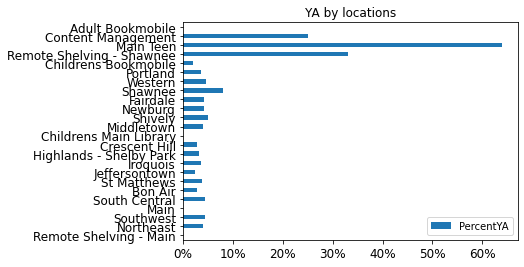

In [36]:
# add code for visualization 

# Get the number of YA books by location
location_ya = books_df['ItemLocation'][books_df['YA_Category'] == 'YA']\
                    .value_counts()
location_ya.rename("YABookCount", inplace=True)

# Get the total number of books by location
location_all = books_df['ItemLocation'].value_counts()
location_all.rename("TotalBookCount", inplace=True)

location_summary = pd.concat([location_all, location_ya], axis=1)

# calculate the percentage of YA books based on the YA count and the total count
location_summary['PercentYA'] = (location_summary['YABookCount'] / 
                                location_summary['TotalBookCount'])

# format the columns and display the dataframe values

location_summary['TotalBookCount'] = location_summary['TotalBookCount']\
                                    .apply(lambda x: "{:,}".format(x, axis=1))
location_summary['YABookCount'] = location_summary['YABookCount']\
                                    .apply(lambda x: "{:,.0f}".format(x, axis=1))
location_summary['PercentYA'] = location_summary['PercentYA'].mul(100).round(1)
location_summary.sort_values(by=['PercentYA'], ascending=False)


fig = location_summary.plot(kind="barh", fontsize=12)
fmt = '{x:,.0f}%'
fig.xaxis.set_major_formatter(fmt)
fig.set_title('YA by locations')
